> Introduction
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image1.png" />
> Over the past four weeks we explored various data preprocessing
> techniques and solved some regression problems using linear and
> logistic regression models.The other side of
>
> the supervised learning paradigm is classi�cation problems.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image2.png" />
> To solve such problems we are going to consider image classi�cation as
> a running
>
> example and solving it using Perceptron() model.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image3.png"
> style="width:0.125in" /> Imports
>
> What is the �rst step?.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image4.png" />
> Import all necessary packages.For classi�cation problems, we need to
> import classes and utilities from sklearn.linear_model .
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image5.png" />
> This module has implementations for different classi�cation models
> like
>
> Perceptron, LogisticRegression, svm and knn
>
> We also need to import a bunch of model selection utilities from
> sklearn.model_selection
>
> module and metrics from sklearn.metrics module.
>
> The data preprocessing utilities are imported from
> sklearn.preprocessing modules.
>
> \# Common imports  
> import numpy as np  
> import os  
> import io  
> import warnings
>
> #sklearn specific imports  
> from sklearn.datasets import fetch_openml  
> from sklearn.preprocessing import MinMaxScaler  
> from sklearn.pipeline import Pipeline  
> from sklearn.dummy import DummyClassifier  
> from sklearn.linear_model import Perceptron  
> from sklearn.metrics import hinge_loss  
> from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,
> precision_recall_cur from sklearn.metrics import precision_score,
> recall_score, classification_report  
> from sklearn.metrics import make_scorer  
> from sklearn.model_selection import cross_validate,
> cross_val_predict,GridSearchCV from pprint import pprint  
> from sklearn.decomposition import PCA
>
> \# To plot pretty figures  
> %matplotlib inline  
> import matplotlib as mpl  
> import matplotlib.pyplot as plt
>
> import seaborn as sns
>
> #global matplotlib settings  
> mpl.rc('figure',figsize=(8,6))  
> mpl.rc('axes', labelsize=14)  
> mpl.rc('xtick', labelsize=12)  
> mpl.rc('ytick', labelsize=12)
>
> \# to make this notebook's output stable across runs
> np.random.seed(42)
>
> Following de�nition helps us supress some warning messages.
> (**Warning:** we are purposefully
>
> supressing the warnings, not a good idea in general!).
>
> \# Ignore all warnings (like convergence..) by sklearn def
> warn(\*args, \*\*kwargs):  
> pass  
> warnings.warn = warn

 Handwritten Digit Classi�cation

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image7.png" />
> We are going to use **perceptron classi�er** to classify (recognize)
> given digit images. Since a single perceptron could only be used for
> binary classi�cation, we consider only two
>
> classes in the �rst half. Eventually we extend it to multi-class
> setting.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image8.png" />
> Suppose we want to recognize whether the given image is of digit zero
> or not (digits other than zero). Then the problem could be cast as a
> binary classi�cation problem.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image9.png" />
> The �rst step is to create a dataset that contains a collection of
> digit images (also called examples, samples) written by humans. Then
> each image should be labelled properly.
>
> Daunting task!
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image10.png" />
> Fortunately, we have a standard benchmark dataset called **MNIST**.
> well, why not make use of it?. Let us import the dataset �rst...

 Data Loading and Splitting

> X,y= fetch_openml('mnist_784',version=1,return_X\_y=True) #it returns
> Data and label as a pandas dataframe
>
> The data matrix X and the respective label vector need to be converted
> to the numpy array by y
>
> calling a to_numpy method.
>
> X = X.to_numpy()  
> y = y.to_numpy()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image12.png" />
> Let's get some information like number of features,number of classes
> about the dataset.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image13.png" />
> Observe that the labels are of string data type not integers.
>
> target_names = np.unique(y)  
> print('Number of samples: {0}, type:{1}'.format(X.shape\[0\],X.dtype))
> print('Number of features: {0}'.format(X.shape\[1\]))  
> print('Minimum:{0},Maximum:{1}'.format(np.min(X),np.max(X)))  
> print('Number of classes: {0},
> type:{1}'.format(len(target_names),y.dtype)) print('Labels:
> {0}'.format(target_names))
>
> Number of samples: 70000, type:float64  
> Number of features: 784  
> Minimum:0.0,Maximum:255.0  
> Number of classes: 10, type:object  
> Labels: \['0' '1' '2' '3' '4' '5' '6' '7' '8' '9'\]
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image14.png" />
> The MNIST dataset is clean and the range of values that each feature
> can take is also known. Therefore, the samples in the dataset may not
> require many data preprocessing
>
> techniques.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image15.png" />
> However, it is often better to scale the range of features between 0
> to 1.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image16.png" />
> So, we can either use MinMaxScaler or MaxAbsScaler .They don't make
> any difference as
>
> the image pixels can takes only positive values from 0 to 255.
>
> X = MinMaxScaler().fit_transform(X)  
> print("Minimum:{0},Maximum:{1}".format(np.min(X),np.max(X)))
>
> Minimum:0.0,Maximum:1.0

 **Data Visualization**

> Let us pick a few images (the images are already shu�ed in the
> dataset) and display them with
>
> their respective labels. As said above, the images are stacked as a
> row vector of size 1 × 784
>
> and therefore must be reshaped to the matrix of size 28 × 28
>
> num_images = 9 \# Choose a square number
>
> factor = np.int(np.sqrt(num_images))

to display them properly.

> fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))  
> idx_offset = 0 \# take "num_images" starting from the index
> "idx_offset" for i in range(factor):  
> index = idx_offset+i\*(factor)  
> for j in range(factor):  
> ax\[i,j\].imshow(X\[index+j\].reshape(28,28),cmap='gray')  
> ax\[i,j\].set_title('Label:{0}'.format(str(y\[index+j\])))  
> ax\[i,j\].set_axis_off()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image18.png"
> style="width:4.42917in;height:3.70972in" />
>
> If you closely observe, you can see that there are moderate variations
> in the appearance of digits (say, digit:1). These matrices are also
> close to sparse (that is, there are lots of 0 (black pixels) in the
> matrix than non-zero pixels).
>
> It is always a good practice to inspect the image pixel values closely
> and ask some interesting questions such as.
>
> 1\. What is the range of pixel values?
>
> 2\. Are the pixel values highly correlated?
>
> 3\. Is the data sparse?
>
> 4\. What is the range of values that a single pixel(element) can take?
> 5. Do we need to apply any pre-processing methods?
>
> plt.figure(figsize=(6,6))  
> plt.imshow(X\[0\].reshape(28,28),cmap='gray')  
> plt.show()

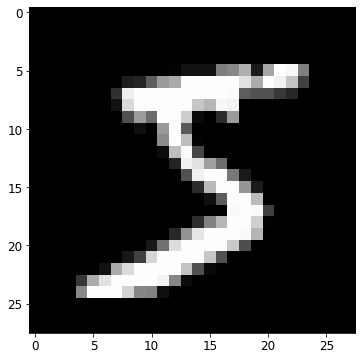

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="2"></th>
<th colspan="2"><blockquote>
<p>Data Splitting</p>
</blockquote></th>
</tr>
<tr class="odd">
<th></th>
<th><blockquote>
<p>Now, we know the details such as number of samples, size of each
sample, number of</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> features (784), number of classes (targets) about the dataset.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image21.png" />
> So let us spilt the total number of samples into train and test set in
> the following ratio:
>
> 60000/10000 (that is, 60000 samples in the training set and 10000
> samples in the testing set).
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image22.png" />
> Since the samples in the data set are already randomly shu�ed, we need
> **not to** shu�e it again.Therefore using train_test_split() may be
> skipped.
>
> x_train,x_test,y_train,y_test =
> X\[:60000\],X\[60000:\],y\[:60000\],y\[60000:\]
>
> Before procedding further, we need to check whether the dataset is
> balanced or imbalanced. We
>
> can do it by plotting the distribution of samples in each classes.
>
> plt.figure(figsize=(10,4))  
> sns.histplot(data=np.int8(y_train),binwidth=0.45,bins=11)  
> plt.xticks(ticks=\[0,1,2,3,4,5,6,7,8,9\],labels=\[0,1,2,3,4,5,6,7,8,9\])
> plt.xlabel('Class')  
> plt.title('Distribution of Samples')  
> plt.show()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image23.png"
> style="width:6.53333in;height:2.97083in" />

 Binary Classi�cation : 0-Detector

 Modifying Labels

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image27.png" />
> Let us start with a simple classi�cation problem, that is, binary
> classi�cation.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image28.png" />
> Since the original label vector contains **10** classes, we need to
> mod�y the number of
>
> classes to **2**
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image29.png" />
> Therefore, the label **0** will be changed to **1** and all other
> labels (1-9) will be changed to **-1**.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image30.png" />
> We name the label vectors as y_train_0 and y_test_0 .
>
> \# intialize new variable names with all -1  
> y_train_0 = -1\*np.ones((len(y_train)))  
> y_test_0 = -1\*np.ones((len(y_test)))
>
> \# find indices of digit 0 image  
> indx_0 = np.where(y_train =='0') \# remember original labels are of
> type str not int \# use those indices to modify y_train_0&y_test_0  
> y_train_0\[indx_0\] = 1  
> indx_0 = np.where(y_test == '0')  
> y_test_0\[indx_0\] = 1

 Sanity check⚛

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image32.png" />
> Let's display the elements of y_train and y_train_0 to verify whether
> the labels are
>
> properly modi�ed. of course, we can't verify all the 60000 labels by
> inspection (unless we have a plenty of time or man power😀)
>
> print(y_train) \# 10 class labels  
> print(y_train_0) \# modified binary labels
>
> \['5' '0' '4' ... '5' '6' '8'\]  
> \[-1. 1. -1. ... -1. -1. -1.\]
>
> print(np.where(y_train=='0')) \# index of label 0's in original vector
> y print(np.where(y_train_0 == 1)) \# index of pos class in new vector
>
> (array(\[ 1, 21, 34, ..., 59952, 59972, 59987\]),) (array(\[ 1, 21,
> 34, ..., 59952, 59972, 59987\]),)
>
> num_images = 9 \# Choose a square number  
> factor = np.int(np.sqrt(num_images))  
> fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))  
> idx_offset = 0 \# take "num_images" starting from the index
> "idx_offset"
>
> for i in range(factor):  
> index = idx_offset+i\*(factor)  
> for j in range(factor):  
> ax\[i,j\].imshow(X\[index+j\].reshape(28,28),cmap='gray')  
> ax\[i,j\].set_title('Label:{0}'.format(str(y_train_0\[index+j\])))
> ax\[i,j\].set_axis_off()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image33.png"
> style="width:4.42917in;height:3.71111in" />
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image34.png"
> style="width:0.125in" /> Testing PCA (Not part of the notebook)
>
> from sklearn.decomposition import PCA  
> from sklearn.metrics import f1_score,precision_score,recall_score  
> pca = PCA(n_components=10,random_state=1)  
> p = pca.fit(x_train)  
> x_train1_reduced = p.transform(x_train)  
> clf=Perceptron(random_state=42,eta0=1,max_iter=100,shuffle=True,validation_fraction=0.1,fi
> clf.fit(x_train1_reduced,y_train_0)  
> f1_a1 = \[\]  
> f1_a2 = \[\]  
> for i in range(1,100):  
> x_test1_reduced_0 = p.transform(x_test\[0:i\*10,:\])  
> x_test1_reduced_1 =
> p.fit(x_test\[0:i\*10,:\]).transform(x_test\[0:i\*10,:\])  
> y_pred1 = clf.predict(x_test1_reduced_0)  
> f1_a1.append(f1_score(y_test_0\[0:i\*10\],y_pred1))  
> y_pred1 = clf.predict(x_test1_reduced_1)  
> f1_a2.append(f1_score(y_test_0\[0:i\*10\],y_pred1))
>
> print(f1_a1)
>
> \[1.0, 0.3333333333333333, 0.25, 0.9090909090909091,
> 0.7272727272727272, 0.6666666666
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image35.png"
> style="width:6.79167in;height:0.23611in" />
>
> print(f1_a2)

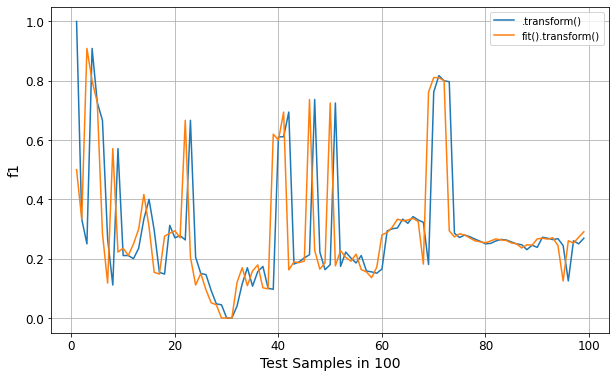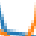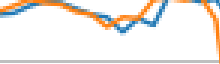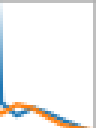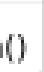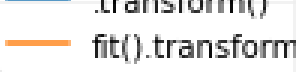

> \[0.5, 0.3333333333333333, 0.9090909090909091, 0.8000000000000002,
> 0.7272727272727272
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image36.png"
> style="width:6.79167in;height:0.23611in" />
>
> plt.figure(figsize=(10,6))  
> plt.plot(np.arange(1,100),f1_a1,label='.transform()')
> plt.plot(np.arange(1,100),f1_a2,label='fit().transform()')
> plt.xlabel('Test Samples in 100')  
> plt.ylabel('f1')  
> plt.grid(True)  
> plt.legend()
>
> \<matplotlib.legend.Legend at 0x7fed3c72c090\>
>
> from sklearn.decomposition import PCA  
> from sklearn.metrics import classification_report  
> from sklearn.base import clone  
> pca = PCA(n_components=10,random_state=1)  
> p = pca.fit(x_train)  
> x_train1_reduced = p.transform(x_train)  
> x_test1_reduced = pca.fit(x_test).transform(x_test\[0:100,:\])  
> clf1=Perceptron(random_state=42,eta0=1,max_iter=100,shuffle=True,validation_fraction=0.1,f
> clf1.fit(x_train1_reduced,y_train_0)  
> y_pred1 = clf1.predict(x_test1_reduced)  
> cm_display =
> ConfusionMatrixDisplay.from_predictions(y_test_0\[0:100\],y_pred1,values_format
> plt.show()

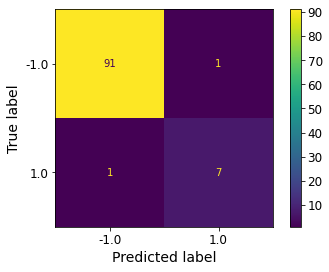

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th><blockquote>
<p>Basline Models</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Enough about Data!
>
> Let us quickly construct a basline model with the following rule (you
> are free to a choose different rule)
>
> 1\. Count number of samples per class.
>
> 2\. The model **always outputs** the class which has highest number of
> samples. 3. Then calculate the accuracy of the basline model.
>
> num_pos = len(np.where(y_train_0==1)\[0\])  
> num_neg = len(np.where(y_train_0==-1)\[0\])  
> print(num_pos,num_neg)
>
> 5923 54077
>
> base_clf = DummyClassifier(strategy='most_frequent') \# there are
> other strategies
>
> base_clf.fit(x_train,y_train_0)  
> print('Training
> accuracy:{0:.2f}'.format(base_clf.score(x_train,y_train_0)))
> print('Testing
> accuracy:{0:.2f}'.format(base_clf.score(x_test,y_test_0)))
>
> Training accuracy:0.90  
> Testing accuracy:0.90

<table style="width:100%;">
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="2"></th>
<th></th>
<th colspan="3">Now the reason is obvious. The model would have
predicted 54077 sample correctly just</th>
<th rowspan="2"><blockquote>
<p>.</p>
</blockquote></th>
</tr>
<tr class="odd">
<th colspan="2" rowspan="2"><blockquote>
<p>by outputing -1 for all the input samples.Therefore the accuracy will
be</p>
</blockquote></th>
<th>54077</th>
<th rowspan="2"><blockquote>
<p>= 90.12%</p>
</blockquote></th>
</tr>
<tr class="header">
<th rowspan="3"></th>
<th>60000</th>
<th rowspan="3"></th>
</tr>
<tr class="odd">
<th></th>
<th colspan="3"><blockquote>
<p>This is the reason why "accuracy" alone is not always a good
measure!.</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="4"><blockquote>
<p>Perceptron model</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Before using Perceptron for Binary Classi�cation, it will be helpful
> to recall the important concepts (equations) covered in technique
> course.
>
> Recap (Theory)
>
> Let us quickly recap various components in the general settings:
>
> 1\. **Training data**: (features, label) or (X, y) , where label is a
> **discrete** number from a �nite y
>
> set.**Features** in this case are pixel values of an image.
>
> 2\. **Model :**

<table>
<colgroup>
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="2">hw</th>
<th rowspan="2">: y</th>
<th>=</th>
<th>g( wT</th>
<th colspan="2"><blockquote>
<p>x)</p>
</blockquote></th>
<th rowspan="2">+ … +</th>
<th rowspan="2">wmxm</th>
<th rowspan="2"><blockquote>
<p>)</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>=</th>
<th>g( w0</th>
<th>+</th>
<th>w1x1</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> where,
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image109.png" />
> w is a weight vector in R(m+1) i.e. it has components: { w0 w1 , … ,
> wm }
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image110.png" />
> g(. ) is a non-linear activation function given by a signum function:
>
> g(z) = { +1, if z ≥ 0
>
> −1, otherwise (i.e. z \< 0)
>
> 3\. **Loss function:** Let ˆ y(i)∈ {−1, +1} be the prediction from
> perceptron and y(i) be the
>
> actual label for -th example. The error is i
>
> 0, if ˆ y(i) = y(i)

e(i) = {

> −wTx(i)y(i) , otherwise (i.e. ˆ y(i)≠y(i) )
>
> This can be compactly written as:

<table>
<colgroup>
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
</colgroup>
<thead>
<tr class="header">
<th>e(i)</th>
<th>= max(−wTx(i)y(i)</th>
<th>, 0) = max(−hw x(i)y(i)</th>
<th><blockquote>
<p>, 0)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> 4\. **Optimization:**

<table style="width:100%;">
<colgroup>
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th colspan="12"><blockquote>
<p>Perceptron learning algorithm</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td colspan="3">1. Initialize w(0)</td>
<td colspan="10"><blockquote>
<p>= 0</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="10"><blockquote>
<p>2. For each training example ( x(i)y(i)</p>
</blockquote></td>
<td>)</td>
<td colspan="2"><blockquote>
<p>:</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="2">y^(i)</td>
<td colspan="4">= sign ( wTx(i)</td>
<td>)</td>
<td colspan="6"><blockquote>
<p>[Calculate the output value]</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="3">w(t+1)</td>
<td>:=</td>
<td>w(t)</td>
<td colspan="3">+ α( y(i)</td>
<td>−</td>
<td colspan="3">y^(i)x(i)</td>
<td><blockquote>
<p>[Update the weights]</p>
</blockquote></td>
</tr>
</tbody>
</table>

> Linearly separable examples lead to convergence of the algorithm with
>
> zero training loss, else it oscillates.

 Parameters of Perceptron class

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image112.png" />
> Let's quickly take a look into the important parameters of the
> Perceptron()
>
> class sklearn.linear_model.Perceptron(\*, penalty=None, alpha=0.0001,
> l1_ratio=0.15,
>
> fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0,
> eta0=1.0,
>
> n_jobs=None, random_state=0, early_stopping=False,
> validation_fraction=0.1,
>
> n_iter_no_change=5, class_weight=None, warm_start=False).
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image113.png" />
> Need not to pay attention to all the arguments and their default
> values.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image114.png" />
> Internally, the API uses the perceptron loss (i.e.,it calls
> **Hinge(0.0)**, where 0.0 is a threshold) and uses SGD to update the
> weights.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image115.png" />
> You may refer to the documentation for more details on the Perceptron
> class.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image116.png" />
> The other way of deploying perceptron is to use the genral
> linear_model.SGDClassifier with loss='perceptron'

 Instantiation

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image118.png" />
> Create an instantance of binary classi�er (bin_clf) and call the fit
> method to train the model.
>
> bin_clf = Perceptron(max_iter=100,random_state=1729)

 Training and Prediction

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image120.png" />
> Call the fit method to train the model
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image121.png" />
> It would be nice to plot the iteration vs loss curve for the training.
> However, sklearn does not have a direct function to plot it.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image122.png" />
> Nevertheless, we can workaround this using partial_fit method (Which
> will be demonstrated at the end of the lecture)
>
> bin_clf.fit(x_train,y_train_0)  
> print('Dimention of Weights w: {0}'.format(bin_clf.coef\_.shape))
> print('Bias :{0}'.format(bin_clf.intercept\_))  
> print('The loss function: {0}'.format(bin_clf.loss_function\_))
>
> Dimention of Weights w: (1, 784)  
> Bias :\[-108.\]  
> The loss function: \<sklearn.linear_model.\_sgd_fast.Hinge object at
> 0x7fed369de470\>
>
> Let us make predictions on the train set and then calculate the
> training accuracy.
>
> y_hat_train_0 = bin_clf.predict(x_train)  
> print('Training Accuracy: ',bin_clf.score(x_train,y_train_0))
>
> Training Accuracy: 0.99095
>
> Let us make the predictions on the test set and then calculate the
> testing accuracy.
>
> print('Test accuracy: ',bin_clf.score(x_test,y_test_0))
>
> Test accuracy: 0.989

 Displaying predictions

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image123.png" />
> Take few images from the testset at random and display it with the
> corresponding
>
> predictions.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image124.png" />
> Plot a few images in a single �gure window alog with their respective
> **predictions**
>
> y_hat_test_0 = bin_clf.predict(x_test)  
> num_images = 9 \# Choose a square number  
> factor = np.int(np.sqrt(num_images))  
> fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))  
> idx_offset = 0 \# display "num_images" starting from idx_offset  
> for i in range(factor):  
> index = idx_offset+i\*(factor)  
> for j in range(factor):  
> ax\[i,j\].imshow(x_test\[index+j\].reshape(28,28),cmap='gray') \# we
> should not use x_train
> ax\[i,j\].set_title('Prediction:{0}'.format(str(y_hat_test_0\[index+j\])))  
> ax\[i,j\].set_axis_off()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image125.png"
> style="width:4.42917in;height:3.70972in" />
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image126.png" />
> Display images of positive classes from testset along with their
> predictions.
>
> indx_0 = np.where(y_test_0 == 1)
>
> zeroImgs = x_test\[indx_0\[0\]\]  
> zeroLabls = y_hat_test_0\[indx_0\[0\]\]  
> num_images = 9 \# Choose a square number
>
> factor = np.int(np.sqrt(num_images))  
> fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))  
> idx_offset = 0 \# display "num_images" starting from idx_offset  
> for i in range(factor):  
> index = idx_offset+i\*(factor)  
> for j in range(factor):  
> ax\[i,j\].imshow(zeroImgs\[index+j\].reshape(28,28),cmap='gray') \# we
> should not use x_tra
> ax\[i,j\].set_title('Prediction:{0}'.format(str(zeroLabls\[index+j\])))  
> ax\[i,j\].set_axis_off() <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image130.png"
> style="width:0.44444in;height:0.51389in" /><img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image131.png"
> style="width:4.42917in;height:3.71008in" />
>
> It seems that there are a signi�cant number of images that are
> correctly classi�ed. Let's see how many?
>
> num_misclassified = np.count_nonzero(zeroLabls== -1) num_correctpred =
> len(zeroLabls)-num_misclassified accuracy =
> num_correctpred/len(zeroLabls)  
> print(accuracy)
>
> 0.9193877551020408
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image127.png" />
> This above score (guess the name of the metric) is less than the
> accuracy score of the
>
> model but it seems preety descent !.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image128.png" />
> Will it be the same if we consider an other digit,say,5 for positive
> class and all other class
>
> as negative?..Of course not. You may cross check it. **(Take it as an
> exercise)**
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image117.png"
> style="width:0.125in" /> Better Evaluation metrics
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image129.png" />
> We now know that using the accuracy **alone** to measure the
> performance of the model is
>
> not suitalbe (esspecially for imbalanced datasets), so which are the
> more suitable metrics
>
> then?

 **Confusion Matrix**

> y_hat_train_0 = bin_clf.predict(x_train)  
> cm_display =
> ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format
> plt.show()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image133.png"
> style="width:3.66805in;height:2.80417in" />
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image134.png" />
> Pay attention to the number of FPs and FNs. Suppose for some reasons,
> we want the

classi�er to avoid FPs to a good extent irrespective of FNs, how can we
acheive it?.

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image135.png" />
> To answer it, let's compute the other metrics which take FPs and FNs
> into account.

 Precision and Recall

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image137.png" />
> We can use the function classification_report to compute these
> parameters. However,
>
> for the time being let's compute these parameters using the data from
> the confusion matrix manually (Not a di�cult thing to do, right 😀?).
>
> cf_matrix = cm_display.confusion_matrix  
> tn = cf_matrix\[0,0\]  
> fn = cf_matrix\[1,0\]  
> fp = cf_matrix\[0,1\]  
> tp = cf_matrix\[1,1\]
>
> precision = tp/(tp+fp)  
> print('Precision: ',precision)  
> recall = tp/(tp+fn)  
> print('Recall: ',recall)  
> accuracy = (tn+tp)/(tn+tp+fn+fp)  
> print('Accuracy: ',accuracy)
>
> Precision: 0.9783072546230441  
> Recall: 0.9289211548201924  
> Accuracy: 0.99095
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image138.png" />
> The precision is close to 0.98. Despite it, we still want to increase
> the precision.. Let's
>
> come back to this later.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image139.png" />
> In general, we would like to know whether the model under
> consideration with the set
>
> hyper-parameters is a good one for a given problem.

 Cross Validation

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image141.png" />
> Well, to address this, we have to use cross-validation folds and
> measure the same metrics
>
> across these folds for different values of hyper-parameters.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image142.png" />
> However, perceptron does not many hyperparameters other than the
> learning rate.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image143.png" />
> For the moment, we set the learning rate to its default value. Later,
> we use GridSearchCV
>
> to �nd the better value for the learning rate.
>
> bin_clf = Perceptron(max_iter=100,random_state=1729) \# repeating for
> readability
>
> scores= cross_validate(bin_clf, x_train, y_train_0, cv=5,

scoring=\['precision','recall','f1'\],

return_estimator=True)

> pprint(scores)
>
> {'estimator': \[Perceptron(max_iter=100, random_state=1729),  
> Perceptron(max_iter=100, random_state=1729),  
> Perceptron(max_iter=100, random_state=1729),  
> Perceptron(max_iter=100, random_state=1729),  
> Perceptron(max_iter=100, random_state=1729)\],  
> 'fit_time': array(\[0.9877584 , 2.04769468, 1.43904305, 1.29100275,
> 1.65540266\]), 'score_time': array(\[0.04624963, 0.04228139,
> 0.04171348, 0.041682 , 0.04296303\]), 'test_f1': array(\[0.95238095,
> 0.91666667, 0.94915254, 0.94117647, 0.95091763\]), 'test_precision':
> array(\[0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345
> 'test_recall': array(\[0.94594595, 0.85472973, 0.94514768, 0.93164557,
> 0.94008439\])}
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image144.png"
> style="width:6.79167in;height:0.23611in" />
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image145.png" />
> **Note:**
>
> The perceptron estimator passed as an argument to the function
> cross_validate is
>
> internally cloned num_fold (cv=5) times and �tted independently on
> each fold. (you can
>
> check this by setting warm_start=True )
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image146.png" />
> Compute the average and standard deviation of scores for all three
> metrics on (k=5) folds
>
> to measure the generalization!.
>
> print('f1, avg:{0:.2f},
> std:{1:.3f}'.format(scores\['test_f1'\].mean(),scores\['test_f
>
> print('precision, avg:{0:.2f},
> std:{1:.2f}'.format(scores\['test_precision'\].mean(),scores\[
>
> print('recall, avg:{0:.2f},
> std:{1:.2f}'.format(scores\['test_recall'\].mean(),scores\['te
>
> f1, avg:0.94, std:0.013
>
> precision, avg:0.96, std:0.01  
> recall, avg:0.92, std:0.03
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image147.png" />
> Let us pick the �rst estimator returned by the cross-validate
> function.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image148.png" />
> So we can hope that the model might also perform well on test data.
> Let's check that out..
>
> bin_clf = scores\['estimator'\]\[0\]  
> y_hat_test_0 = bin_clf.predict(x_test)  
> cm_display =
> ConfusionMatrixDisplay.from_predictions(y_test_0,y_hat_test_0,values_format='
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image149.png"
> style="width:3.58472in;height:2.80417in" />
>
> print('Precision %.2f'%precision_score(y_test_0,y_hat_test_0))
> print('Recall %.2f'%recall_score(y_test_0,y_hat_test_0))
>
> Precision 0.95  
> Recall 0.95
>
> This is good!.
>
> **Way-2 for Generalization:**  
> (Optional)
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image150.png" />
> There is an **another approach** of getting predicted labels via
> cross-validation and using it to measure the generalization.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image151.png" />
> In this case, each sample in the dataset will be part of only one test
> set in the splited folds.
>
> y_hat_train_0 = cross_val_predict(bin_clf, x_train, y_train_0, cv=5)
>
> cm_display =
> ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format
> plt.show()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image152.png"
> style="width:3.66805in;height:2.80278in" />
>
> cf_matrix = cm_display.confusion_matrix  
> tn = cf_matrix\[0,0\]  
> fn = cf_matrix\[1,0\]  
> fp = cf_matrix\[0,1\]  
> tp = cf_matrix\[1,1\]
>
> precision = tp/(tp+fp)  
> print('Precision: %.2f'%precision)  
> recall = tp/(tp+fn)  
> print('Recall:%.2f'%recall)  
> f1 = 2/((1/precision)+(1/recall))  
> print('f1:%.2f'%f1)  
> accuracy = (tn+tp)/(tn+tp+fn+fp)  
> print('Accuracy: %.2f'%accuracy)
>
> Precision: 0.96  
> Recall:0.92  
> f1:0.94  
> Accuracy: 0.99
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image153.png" />
> Compare the precision and recall score obtained by the above method
> with that of the
>
> previous method (i.e., using cross_validate )
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image154.png" />
> Finally, we can print all these scores as a report using the
> classification_report function
>
> print('Precision %.2f'%precision_score(y_train_0,y_hat_train_0))
> print('Recall %.2f'%recall_score(y_train_0,y_hat_train_0))
> print('-'\*50)  
> print(classification_report(y_train_0,y_hat_train_0))
>
> Precision 0.96  
> Recall 0.92  
> -------------------------------------------------- precision recall
> f1-score support
>
> -1.0 0.99 1.00 0.99 54077
>
> 1.0 0.96 0.92 0.94 5923
>
> accuracy 0.99 60000
>
> macro avg 0.98 0.96 0.97 60000
>
> weighted avg 0.99 0.99 0.99 60000

 Precision/Recall Tradeoff

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image156.png" />
> Often time we need to make a trade off between precision and recall
> scores of a model.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image157.png" />
> It depends on the problem at hand.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image158.png" />
> It is important to note that we should **not** pass the **predicted
> labels** as input to
>
> precision_recall_curve function, instead we need to pass the
> probability scores or the
>
> output from the decision function!.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image159.png" />
> The Perceptron() class contains a decision_function method, therefore
> we can make
>
> use of it.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image160.png" />
> Then, internaly the decision scores are sorted, **tps** and **fps**
> will be computed by changing
>
> the threshold from index\[0\] to index\[-1\].
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image161.png" />
> Let us compute the scores from the decision function.
>
> bin_clf = Perceptron(random_state=1729)
>
> bin_clf.fit(x_train,y_train_0)
>
> y_scores = bin_clf.decision_function(x_train)
>
> sns.histplot(np.sort(y_scores))
>
> plt.show()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image162.png"
> style="width:4.20972in;height:2.61528in" />
>
> Can you think why there are so many negative values than the
> positives?.
>
> **Hint:** Class-Imbalance
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image163.png" />
> Suppose threshold takes the value of -600,then all the samples having
> score greater than
>
> -600 is set to 1(Positive label) and less than it is set to -1 (neg
> label).
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image164.png" />
> Therefore, the number of False Positives will be increased. This will
> in turn reduce the
>
> precision score to a greater extent.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image165.png" />
> On the otherhand, if the threshold takes the value of, say, 400. Then,
> the number of false
>
> negatives will be increase and hence the recall will reduce to a
> greater extent.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image166.png" />
> Let's see it in action.

precisions, recalls, thresholds = precision_recall_curve(y_train_0,
y_scores,pos_label=1)

> plt.figure(figsize=(10,4))  
> plt.plot(precisions\[:-1\], recalls\[:-1\], "b--")
> plt.xlabel('Precision')  
> plt.ylabel('Recall')  
> plt.grid(True)  
> plt.show()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image167.png"
> style="width:6.41944in;height:2.80417in" />
>
> plt.figure(figsize=(10,4))  
> plt.plot(thresholds, precisions\[:-1\], "b--", label="Precision")
> plt.plot(thresholds, recalls\[:-1\], "g-", label="Recall")  
> plt.xlabel('Threshold')  
> plt.grid(True)  
> plt.legend(loc='upper right')  
> plt.show()
>
> #get the index of threshold around zero  
> idx_th = np.where(np.logical_and(thresholds\>0,thresholds\<1))
> print('precision for zero thereshold:',precisions\[idx_th\[0\]\[0\]\])
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image170.png"
> style="width:6.23194in;height:2.80333in" />
>
> precision for zero thereshold: 0.9783072546230441
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image27.png" />
> **Here is the solution** to the question how can we increase the
> precision of the classi�er by
>
> compromising the recall. we can make use of the above plot.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image168.png" />
> Let's see how.
>
> def predict(y_scores):  
> y_hat = np.where(y_scores\>20,1,-1) \# shifted signum function return
> y_hat
>
> y_hat_train_0\_thrsh = predict(y_scores)  
> print(classification_report(y_train_0,y_hat_train_0\_thrsh))
>
> precision recall f1-score support
>
> -1.0 0.99 1.00 0.99 54077 1.0 0.99 0.90 0.94 5923
>
> accuracy 0.99 60000 macro avg 0.99 0.95 0.97 60000 weighted avg 0.99
> 0.99 0.99 60000
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image169.png"
> style="width:0.125in" /> The ROC Curve
>
> from sklearn.metrics import roc_curve
>
> fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)
> plt.figure(figsize=(10,4))  
> plt.plot(fpr, tpr, linewidth=2,label='Perceptron') plt.plot(\[0, 1\],
> \[0, 1\], 'k--',label='baseEstimator') plt.xlabel('False Positive
> Rate')  
> plt.ylabel('True Positive Rate')  
> plt.grid(True)  
> plt.legend()  
> plt.show()

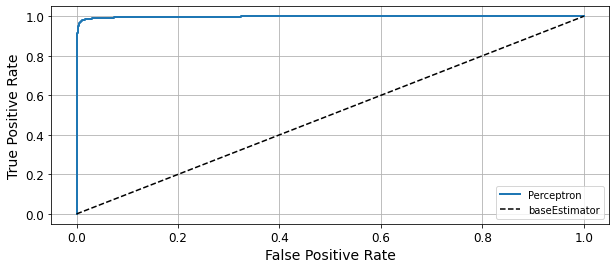

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="2"><p></p>
<p></p></th>
<th colspan="2"><blockquote>
<p>Warm start vs Cold Start</p>
<p>Cold Start</p>
</blockquote></th>
</tr>
<tr class="odd">
<th></th>
<th><blockquote>
<p>If we execute the fit method of bin_clf repeatedly, we get the same
score for both</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> training and testing accuracy.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image173.png" />
> This because every time the fit method is called, the model weights
> are initialized to the same values. Therfore, we obtain the same
> score.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image174.png" />
> This is termed as **cold start**. Let's execute the following cell 4
> times and observe the score.
>
> bin_clf.fit(x_train,y_train_0)  
> y_hat_train_0 = bin_clf.predict(x_train)  
> print('Training Accuracy:',bin_clf.score(x_train,y_train_0))
> print('Test accuracy: ',bin_clf.score(x_test,y_test_0))
>
> Training Accuracy: 0.99095  
> Test accuracy: 0.989
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image175.png"
> style="width:0.125in" /> Warm Start
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image176.png" />
> As you might have gussed, there is an approach called Warm Start
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image177.png" />
> Setting warm_start=True retains the weight values of the model after
> max_iter and hence produce different results for each execution.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image178.png" />
> Warm starting is useful in many ways.It helps us train the model by
> initializing the weight values from the previous state.So we can pause
> the training and resume it whenever we get the resource for
> computation.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image28.png" />
> Of course, it is not required for simple models like perceptron and
> for a small dataset like MNIST.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th><blockquote>
<p>In this notebook, we use this feature to plot the iteration vs loss
curve.</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image114.png" />
> Let us execute the following lines of code 4 times and observe how the
> training accuracy
>
> bin_clf_warm =
> Perceptron(max_iter=100,random_state=1729,warm_start=True) changes for
> each execution.
>
> bin_clf_warm.fit(x_train,y_train_0)  
> print('Training Accuracy:',bin_clf_warm.score(x_train,y_train_0))
>
> Training Accuracy: 0.99095

 Multiclass Classi�er (OneVsAll)

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image181.png" />
> We know that the perceptron is a binary classi�er. However, MNIST
> dataset contains 10 classes. Then how can we extend the idea to handle
> multi-class problems?
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image182.png" />
> **Solution:** Combine multiple binary classi�ers and devise a suitable
> scoring metric.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image183.png" />
> Sklearn makes it extremely easy without modifying a single line of
> code that we have written for the binary classi�er.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image184.png" />
> Sklearn does this by counting a number of unique elements (10 in this
> case) in the label vector y_train and converting labels using
> LabelBinarizer to �t each binary classifer (Remember binary classi�er
> requires binary labels, Tautology :-))
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image185.png" />
> That's all!
>
> from sklearn.linear_model import Perceptron  
> from sklearn.preprocessing import LabelBinarizer
>
> clf = Perceptron(random_state=1729)
>
> \# let's use label binarizer just to see the encoding  
> y_train_ovr = LabelBinarizer().fit_transform(y_train) \# setting
> sparse_output=True in Labe for i in range(10):  
> print('{0}:{1}'.format(y_train\[i\],y_train_ovr\[i\]))
>
> 5:\[0 0 0 0 0 1 0 0 0 0\]  
> 0:\[1 0 0 0 0 0 0 0 0 0\]  
> 4:\[0 0 0 0 1 0 0 0 0 0\]  
> 1:\[0 1 0 0 0 0 0 0 0 0\]  
> 9:\[0 0 0 0 0 0 0 0 0 1\]  
> 2:\[0 0 1 0 0 0 0 0 0 0\]  
> 1:\[0 1 0 0 0 0 0 0 0 0\]  
> 3:\[0 0 0 1 0 0 0 0 0 0\]  
> 1:\[0 1 0 0 0 0 0 0 0 0\]  
> 4:\[0 0 0 0 1 0 0 0 0 0\]

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th><blockquote>
<p>The y_train_ovr will be of size of size 60000 × 10</p>
</blockquote></th>
<th><blockquote>
<p>.</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image114.png" />
> The �rst column will be a (binary) label vector for 0-detector 😀 and
> the next one for 1- Detector and so on.

clf.fit(x_train,y_train)

> Perceptron(random_state=1729)
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image187.png" />
> What had actually happened internally was that the API automatically
> created 10 binary classi�ers, converted labels to binary sparse matrix
> and trained them with the binarized labels!.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image188.png" />
> During the inference time, the input will be passed through all these
> 10 classi�ers and the highest score among the ouput from the
> classi�ers will be considered as the predicted class.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image189.png" />
> To see it in action, let us execute the following lines of code

print('Shape of Weight matrix:{0} and bias
vector:{1}'.format(clf.coef\_.shape,clf.intercep

> Shape of Weight matrix:(10, 784) and bias vector:(10,)

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th><blockquote>
<p>So it is a matrix of size 10 × 784</p>
</blockquote></th>
<th><blockquote>
<p>where each row represents the weights for a single</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> binary classi�er.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image191.png" />
> Important difference to note is that there is no signum function
> associated with the perceptron.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image192.png" />
> The class of a perceptron that outputs the maximum score for the input
> sample is considered as the predicted class.

scores = clf.decision_function(x_train\[6\].reshape(1,-1))

print(scores)

print('The predicted class: ',np.argmax(scores))

> \[\[-631.88492118 154.366213 -65.23234141 -90.95338716 -189.29568627
>
> -137.14385236 -99.64604383 -159.09859285 -136.86391388
> -199.26120723\]\]
>
> The predicted class: 1

print('Preicted output:\n')

print(clf.predict(x_train\[0\].reshape(1,-1)))

> Preicted output:
>
> \['5'\]

\# get the prepdiction for all training samples

y_hat = clf.predict(x_train)

print(classification_report(y_train,y_hat))

> precision recall f1-score support
>
> 0 0.98 0.95 0.97 5923  
> 1 0.94 0.98 0.96 6742  
> 2 0.89 0.90 0.90 5958  
> 3 0.86 0.87 0.87 6131  
> 4 0.89 0.94 0.91 5842  
> 5 0.81 0.88 0.85 5421  
> 6 0.92 0.97 0.94 5918  
> 7 0.91 0.94 0.92 6265  
> 8 0.92 0.77 0.84 5851  
> 9 0.92 0.82 0.87 5949
>
> accuracy 0.90 60000 macro avg 0.90 0.90 0.90 60000 weighted avg 0.91
> 0.90 0.90 60000
>
> Let us display the confusion matrix and relate it with the report
> above.
>
> cm_display =
> ConfusionMatrixDisplay.from_predictions(y_train,y_hat,values_format='.5g')
> \#
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image193.png"
> style="width:3.42778in;height:2.80278in" />
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image194.png" />
> What are all the insights we could infer from the above �gure?
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image195.png" />
> Digit 2 is often confused with Digit 3 (Reasonable!).
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image196.png"
> style="width:0.125in" /> Making a Pipeline
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image197.png" />
> Let's create a pipline to keep the code compact.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image198.png" />
> Recall that, the MNIST dataset is clean and hence doesn't require much
> preprocessing.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image199.png" />
> The one potential preprocessing technique we may use is to scale the
> features within the
>
> range (0,1)
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image200.png" />
> It is **not** similar to scaling down the range values between 0 and
> 1.
>
> \# create a list with named tuples
>
> estimators =
> \[('std_scaler',MinMaxScaler()),('bin_clf',Perceptron())\] pipe =
> Pipeline(estimators)
>
> pipe.fit(x_train,y_train_0)
>
> Pipeline(steps=\[('std_scaler', MinMaxScaler()), ('bin_clf',
> Perceptron())\])
>
> y_hat_train_0 = pipe.predict(x_train)  
> cm_display =
> ConfusionMatrixDisplay.from_predictions(y_train_0,y_hat_train_0,values_format
> plt.show()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image201.png"
> style="width:3.66805in;height:2.80417in" />
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image202.png"
> style="width:0.125in" /> Iteration vs Loss Curve
>
> The other way of **Plotting Iteration Vs Loss curve** with the
> Partial_fit method.
>
> iterations = 100  
> bin_clf1 = Perceptron(max_iter=1000,random_state=2094)  
> Loss_clf1 = \[\]  
> for i in range(iterations):  
> bin_clf1.partial_fit(x_train,y_train_0,classes=np.array(\[1,-1\]))
> y_hat_0 = bin_clf1.decision_function(x_train)  
> Loss_clf1.append(hinge_loss(y_train_0,y_hat_0))
>
> plt.figure()  
> plt.plot(np.arange(iterations),Loss_clf1)  
> plt.grid(True)  
> plt.xlabel('Iteration')  
> plt.ylabel('Training Loss')  
> plt.show()

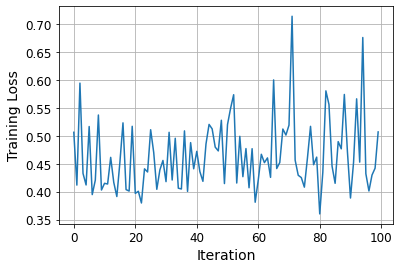

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="2"></th>
<th colspan="2"><blockquote>
<p>GridSearchCV</p>
</blockquote></th>
</tr>
<tr class="odd">
<th></th>
<th>So far we didn't do any hyperparameter tuning. We accepted the
default value for learning</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> rate of the Perceptron class.
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image205.png" />
> Now, let us search for a better learning rate using GridSearchCV .
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image206.png" />
> No matter what the learning rate is, the loss will never converge to
> zero as the claases are
>
> not linearly separable.
>
> scoring = make_scorer(hinge_loss,greater_is_better=False)  
> lr_grid = \[1/2\*\*n for n in range(1,6)\]  
> bin_clf_gscv =
> GridSearchCV(Perceptron(),param_grid={"eta0":lr_grid},scoring=scoring,cv=5)
> bin_clf_gscv.fit(x_train,y_train_0)
>
> GridSearchCV(cv=5, estimator=Perceptron(),  
> param_grid={'eta0': \[0.5, 0.25, 0.125, 0.0625, 0.03125\]},
> scoring=make_scorer(hinge_loss, greater_is_better=False))
>
> pprint(bin_clf_gscv.cv_results\_)
>
> {'mean_fit_time': array(\[1.17995534, 1.18205361, 1.12285514,
> 0.9429121 , 0.87185159\] 'mean_score_time': array(\[0.01893158,
> 0.01930118, 0.01886573, 0.01868706, 0.0190487 'mean_test_score':
> array(\[-0.0285 , -0.0285 , -0.02643333, -0.03066667, -0.04
> 'param_eta0': masked_array(data=\[0.5, 0.25, 0.125, 0.0625,
> 0.03125\],  
> mask=\[False, False, False, False, False\],  
> fill_value='?',  
> dtype=object),  
> 'params': \[{'eta0': 0.5},  
> {'eta0': 0.25},  
> {'eta0': 0.125},  
> {'eta0': 0.0625},  
> {'eta0': 0.03125}\],  
> 'rank_test_score': array(\[2, 2, 1, 4, 5\], dtype=int32),  
> 'split0_test_score': array(\[-0.02166667, -0.02166667, -0.02166667,
> -0.02166667, -0.
>
> 'split1_test_score': array(\[-0.0395, -0.0395, -0.0395, -0.0395,
> -0.0395\]), 'split2_test_score': array(\[-0.02816667, -0.02816667,
> -0.02816667, -0.02816667, -0. 'split3_test_score': array(\[-0.023 ,
> -0.023 , -0.023 , -0.04416667, -0. 'split4_test_score':
> array(\[-0.03016667, -0.03016667, -0.01983333, -0.01983333, -0.
> 'std_fit_time': array(\[0.30778545, 0.3059057 , 0.28833718,
> 0.12568082, 0.09936945\]) 'std_score_time': array(\[0.00028092,
> 0.00073562, 0.00023615, 0.00021791, 0.0003486 'std_test_score':
> array(\[0.00633772, 0.00633772, 0.00709663, 0.0096425 , 0.01918697

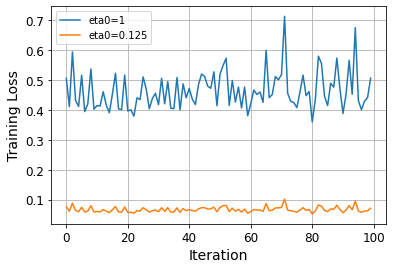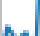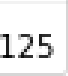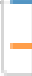

> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image213.png"
> style="width:6.79167in;height:0.23611in" />
>
> As you can see, the best learning rate is 0.125.
>
> iterations = 100  
> Loss = \[\]  
> best_bin_clf = Perceptron(max_iter=1000,random_state=2094,eta0=0.125)
> for i in range(iterations):  
> best_bin_clf.partial_fit(x_train,y_train_0,classes=np.array(\[1,-1\]))
> y_hat_0 = best_bin_clf.decision_function(x_train)  
> Loss.append(hinge_loss(y_train_0,y_hat_0))
>
> plt.figure()  
> plt.plot(np.arange(iterations),Loss_clf1,label='eta0=1')
> plt.plot(np.arange(iterations),Loss,label='eta0=0.125')
> plt.grid(True)  
> plt.legend()  
> plt.xlabel('Iteration')  
> plt.ylabel('Training Loss')  
> plt.show()
>
> Well, instead of instatiating a Perceptron class with a new learning
> rate and re-train the model,
>
> we could simply get the best_estimator from GridSearchCV as follows.
>
> best_bin_clf = bin_clf_gscv.best_estimator\_
>
> y_hat_train_0 = bin_clf.predict(x_train)  
> print(classification_report(y_train_0,y_hat_train_0))
>
> precision recall f1-score support
>
> -1.0 0.99 1.00 0.99 54077 1.0 0.98 0.93 0.95 5923
>
> accuracy 0.99 60000
>
> macro avg 0.99 0.96 0.97 60000 weighted avg 0.99 0.99 0.99 60000
>
> Compare the classi�cation report when eta0=1

 Visualizing weight vectors (Optional)

> It will be interesting to look into the samples which are misclassi�ed
> as False Positives (that is, images that are not zero but classi�ed as
> zero), and come up with some possible reasons. Shall
>
> we do it?
>
> \# repeating the code for readabilituy  
> bin_clf = Perceptron(max_iter=100)  
> bin_clf.fit(x_train,y_train_0)  
> y_hat_train_0 = bin_clf.predict(x_train)
>
> #find the index of false positive samples  
> idx_n = np.where(y_train_0 ==-1) \# index of true -ve samples  
> idx_pred_p = np.where(y_hat_train_0==1) \# index of predicted positive
> samples idx_pred_n = np.where(y_hat_train_0==-1) \# index of predicted
> negative samples idx_fp = np.intersect1d(idx_n,idx_pred_p)  
> idx_tn = np.intersect1d(idx_n,idx_pred_n)
>
> fig,ax = plt.subplots(nrows=factor,ncols=factor,figsize=(8,6))  
> idx_offset = 0  
> for i in range(3):  
> index = idx_offset+i  
> for j in range(3):  
> ax\[i,j\].imshow(x_train\[idx_fp\[index+j\]\].reshape(28,28),cmap='gray')
> \# we should not us ax\[i,j\].set_title('GT:{0},
> Pr:{1}'.format(str(y_train_0\[idx_fp\[index+j\]\]),str(y_hat_tr
> ax\[i,j\].set_axis_off()
>
> We can do some reasoning if we look into what the perceptron is
> actually learning about the digit **0** by visualizing the weight
> values after the training.!<img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image235.png"
> style="width:4.42917in;height:3.71008in" />
>
> from matplotlib.colors import Normalize
>
> w = bin_clf.coef\_  
> w_matrix = w.reshape(28,28)  
> fig = plt.figure()  
> plt.imshow(w_matrix,cmap='gray')  
> plt.grid(False)  
> plt.axis(False)  
> plt.colorbar()  
> plt.show()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image234.png"
> style="width:3.03194in;height:2.45972in" />
>
> activation = w \* x_train\[idx_fp\[0\]\].reshape(1,-1)  
> lin_out = activation.reshape(28,28)  
> plt.subplot(1,2,1)  
> plt.imshow(x_train\[idx_fp\[0\]\].reshape(28,28),cmap='gray')  
> plt.colorbar()  
> \# lin_out\[lin_out\<0\]=0 #just set the value less than zero to zero
> plt.subplot(1,2,2)  
> plt.imshow(lin_out,cmap='gray')  
> plt.colorbar()  
> plt.grid(False)  
> plt.axis(False)  
> plt.show()
>
> #input to the signum  
> print(np.sum(lin_out) + bin_clf.intercept\_) <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image237.png"
> style="width:4.075in;height:2.54297in" />
>
> \[22.90520569\]
>
> activation = w\*x_train\[idx_tn\[0\]\].reshape(1,-1)  
> lin_out = activation.reshape(28,28)  
> plt.subplot(1,2,1)  
> plt.imshow(x_train\[idx_tn\[0\]\].reshape(28,28),cmap='gray')  
> plt.colorbar()  
> \# lin_out\[lin_out\<0\]=0 #just set the value less than zero to zero
> plt.subplot(1,2,2)  
> plt.imshow(lin_out,cmap='gray')  
> plt.colorbar()  
> plt.grid(False)  
> plt.axis(False)  
> plt.show()
>
> <img
> src="attachment:vertopal_6265ee16d2ee4214bcfbcc2942674029/media/image236.png"
> style="width:4.075in;height:2.54306in" />
>
> #input to signum  
> print(np.sum(lin_out) + bin_clf.intercept\_)
>
> \[-293.33960784\]

\-

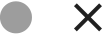
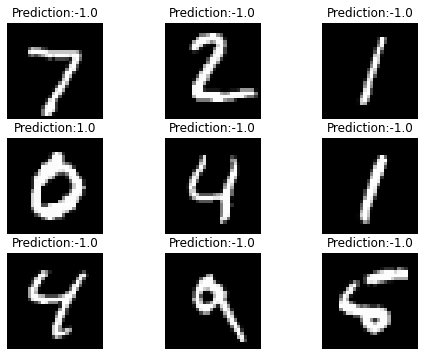
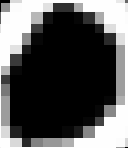
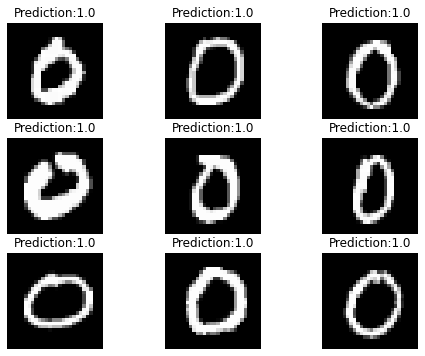
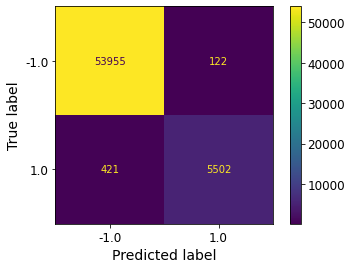
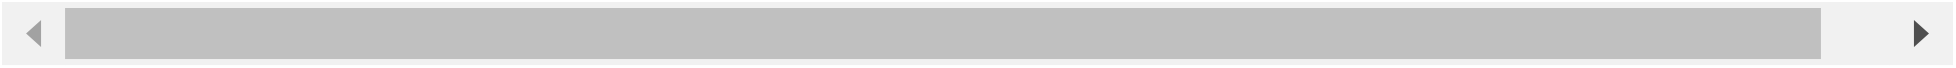
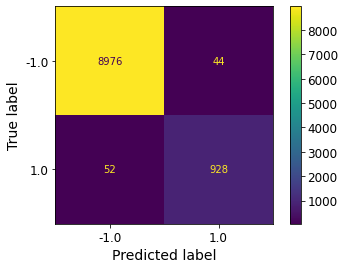
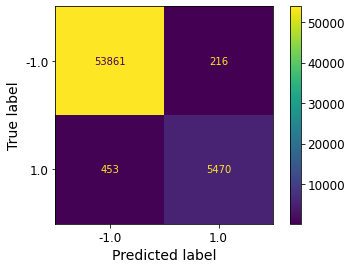
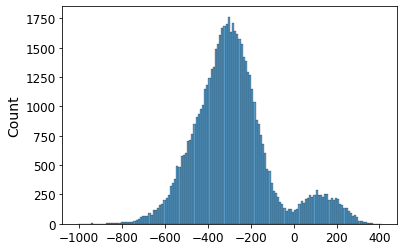
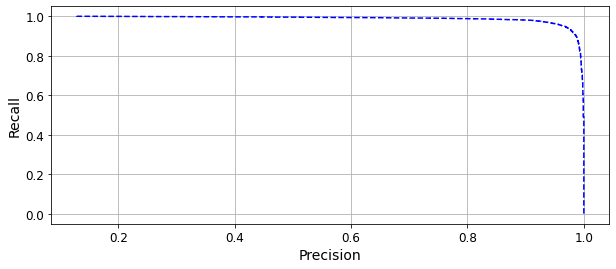
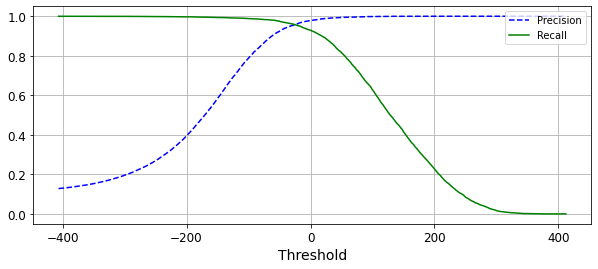
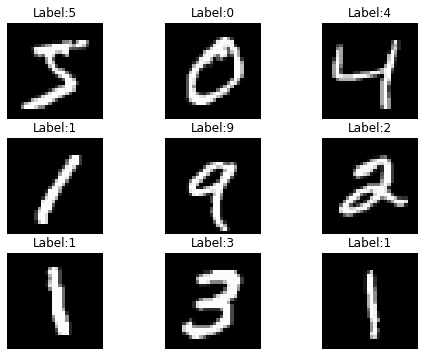
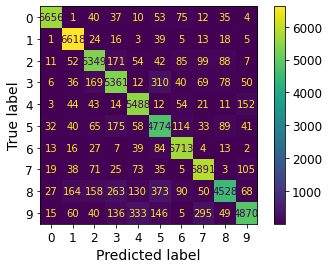
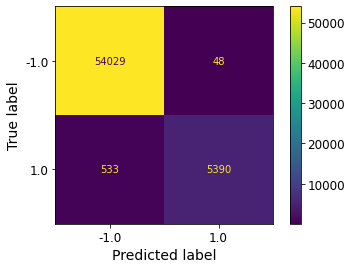
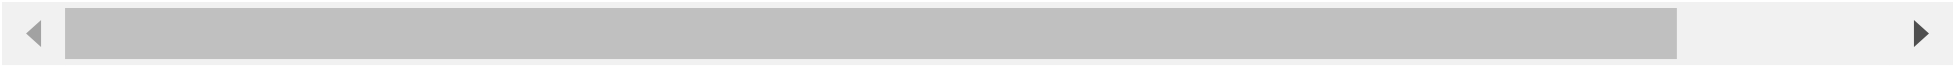
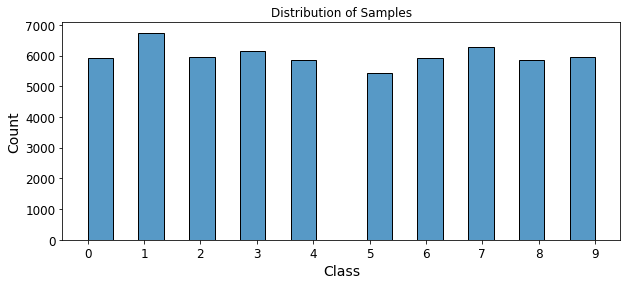
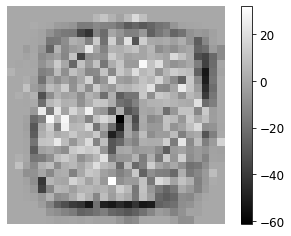
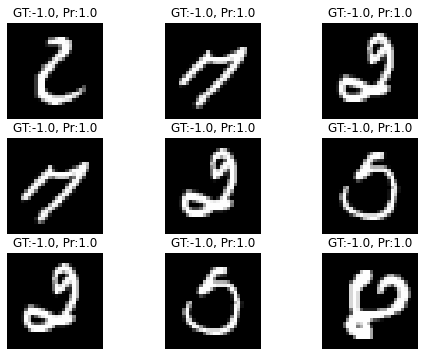
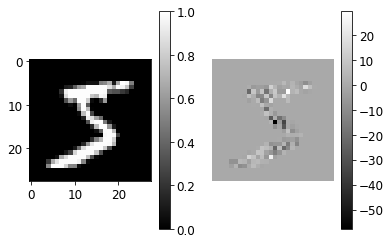
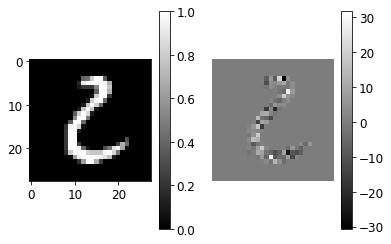
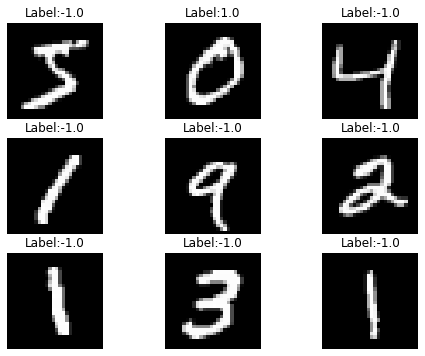
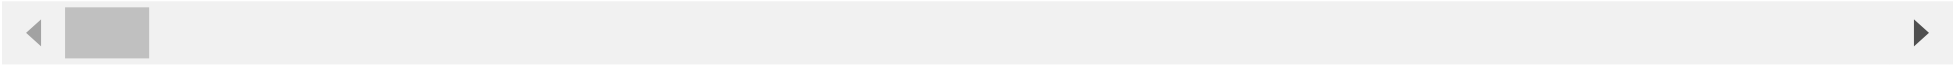
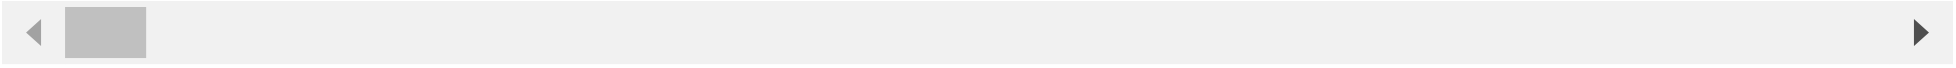